In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train) # Train the model on the training data
        y_pred = model.predict(X_test) # Predict the test data
        if len(np.unique(y_train)) == 2: # Binary classification
            precision = precision_score(y_test, y_pred) # Calculate precision score
            recall = recall_score(y_test, y_pred) # Calculate recall score (recall = sensitivity)
            f1 = f1_score(y_test, y_pred) # Calculate F1 score (F1 = 2 * (precision * recall) / (precision + recall))
        else:
            precision = precision_score(y_test, y_pred, average='weighted') # Calculate weighted precision score for multiclass classification
            recall = recall_score(y_test, y_pred, average='weighted') # Calculate weighted recall score for multiclass classification
            f1 = f1_score(y_test, y_pred, average='weighted') # Calculate weighted F1 score for multiclass classification
        accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy score (accuracy = (TP + TN) / (TP + TN + FP + FN))
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
    return pd.DataFrame(results)

In [6]:
# Iris Dataset Analysis
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

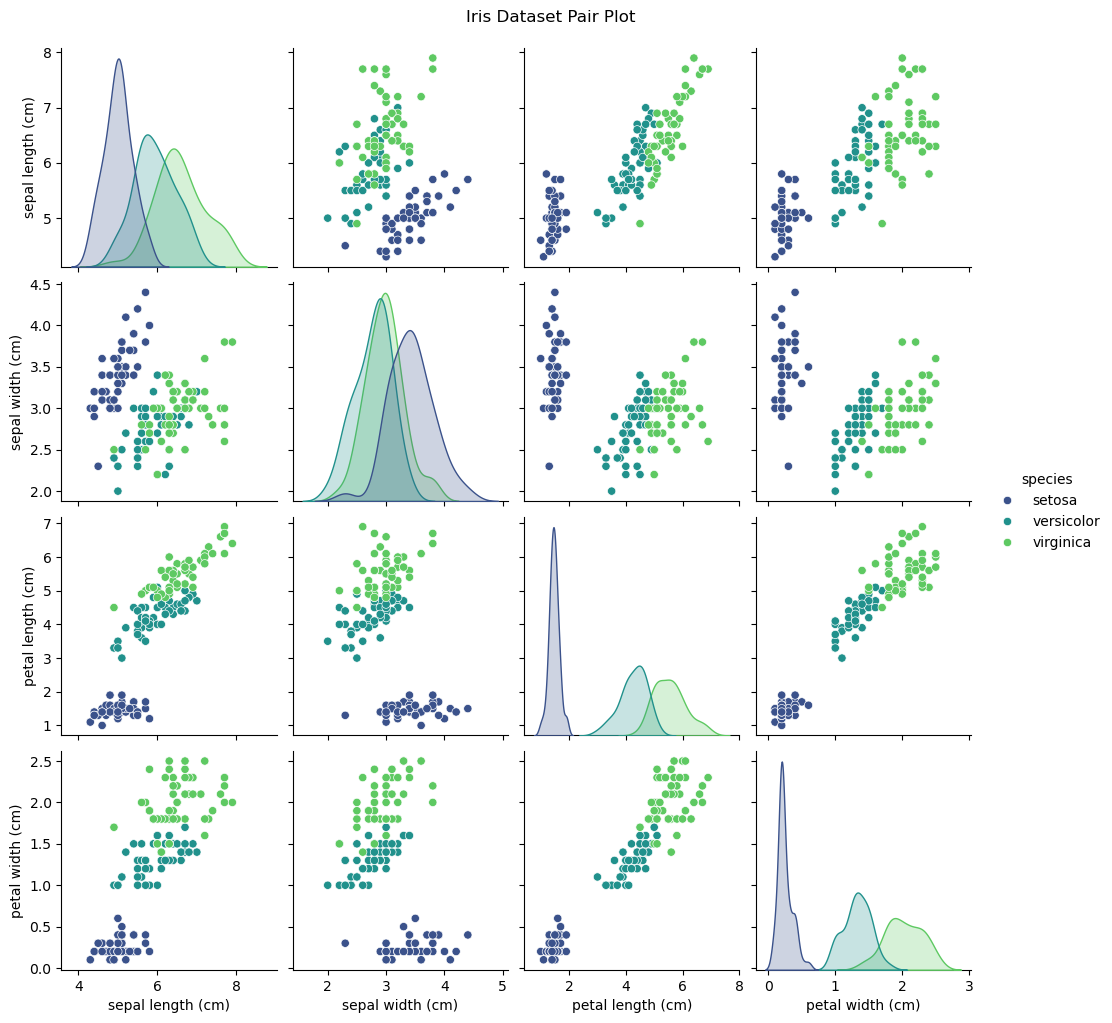

In [7]:
# Visualizations for Iris
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle('Iris Dataset Pair Plot', y=1.02)
plt.show()

In [8]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42, stratify=iris.target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Define models
models = {
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'MLP (100,)': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000),
    'MLP (50,50)': MLPClassifier(hidden_layer_sizes=(50,50), random_state=42, max_iter=1000)
}

In [10]:
# Evaluate models on Iris
iris_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, models)
print("Iris Dataset Results:")
print(iris_results)


Iris Dataset Results:
                 Model  Accuracy  Precision    Recall        F1
0                  SVM  0.966667   0.969697  0.966667  0.966583
1        Decision Tree  0.933333   0.933333  0.933333  0.933333
2  Logistic Regression  0.933333   0.933333  0.933333  0.933333
3           MLP (100,)  0.966667   0.969697  0.966667  0.966583
4          MLP (50,50)  0.966667   0.969697  0.966667  0.966583


In [11]:
# Breast Cancer Dataset Analysis
cancer = load_breast_cancer()

In [12]:
# Create TWO SEPARATE DataFrames
# 1. Numerical DataFrame for correlation
cancer_df_num = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df_num['diagnosis'] = cancer.target  # Numerical target (0/1)


In [13]:
# 2. Visualization DataFrame with strings
cancer_df_viz = cancer_df_num.copy()
cancer_df_viz['diagnosis'] = cancer.target_names[cancer.target] 

In [14]:
# Compute correlation using NUMERICAL DataFrame
corr = cancer_df_num.corr()['diagnosis'].abs().sort_values(ascending=False)
top_features = corr.index[1:6]  # Exclude 'diagnosis'

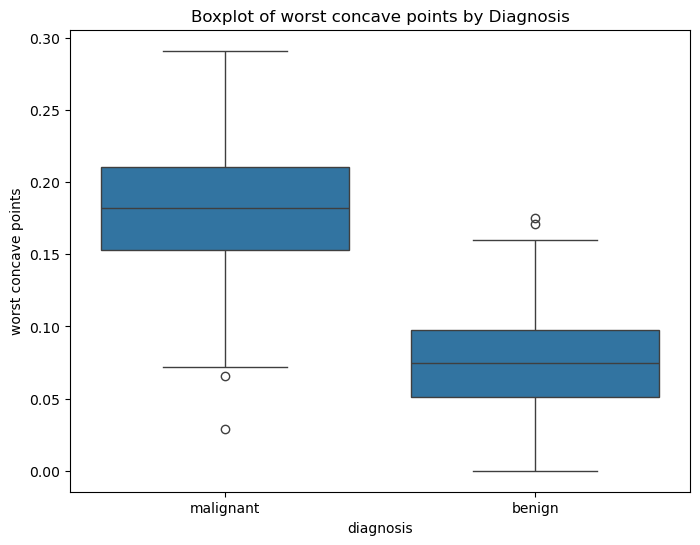

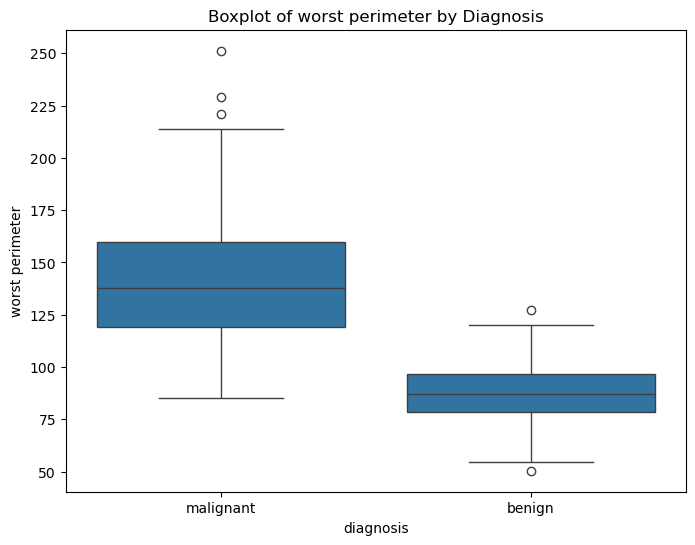

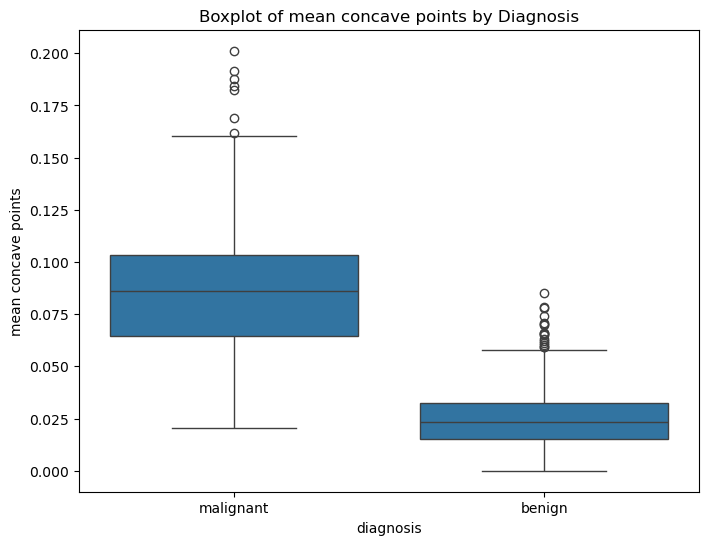

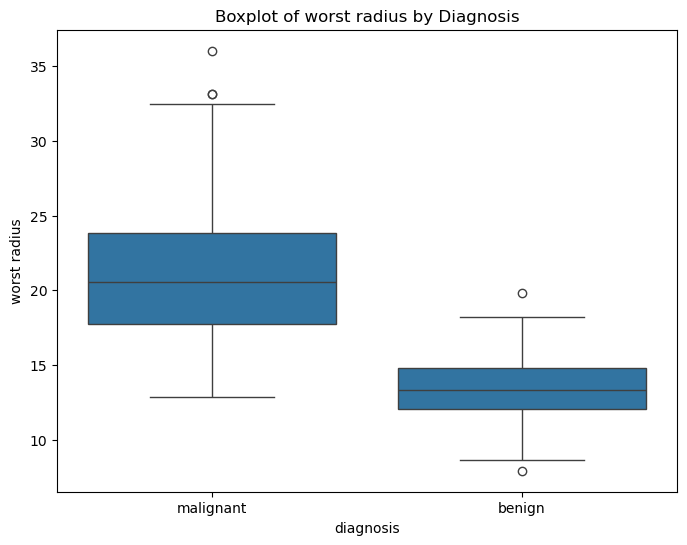

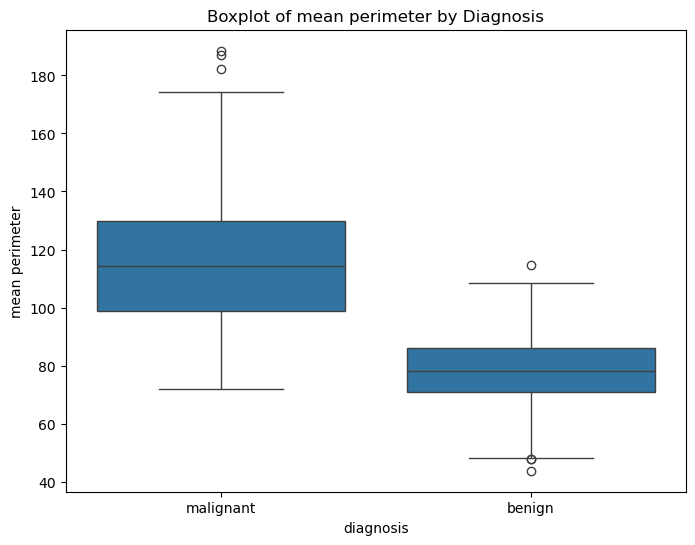

In [15]:
# Visualization uses SEPARATE DataFrame with strings
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=cancer_df_viz)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()

In [16]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=42, stratify=cancer.target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Evaluate models on Breast Cancer
cancer_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, models)
print("\nBreast Cancer Dataset Results:")
print(cancer_results)



Breast Cancer Dataset Results:
                 Model  Accuracy  Precision    Recall        F1
0                  SVM  0.982456   0.986111  0.986111  0.986111
1        Decision Tree  0.912281   0.955882  0.902778  0.928571
2  Logistic Regression  0.982456   0.986111  0.986111  0.986111
3           MLP (100,)  0.964912   0.985714  0.958333  0.971831
4          MLP (50,50)  0.956140   0.985507  0.944444  0.964539
